In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 读取数据
path1=r'C:\Users\14253\Desktop\数据科学\datasets\law'
df = pd.read_csv(path1+'\\2004-2023law.csv')
df=df[df['年份']<2024]

df.describe()

,年份,页码计数,施引文献
count,207246.000000,1.915810e+05,207246.000000
mean,2016.214282,2.174913e+02,9.032261
std,5.365859,3.652789e+04,26.954979
min,2004.000000,-6.995100e+04,0.000000
25%,2012.000000,1.100000e+01,0.000000
50%,2017.000000,1.800000e+01,2.000000
75%,2021.000000,2.500000e+01,8.000000
max,2023.000000,1.167003e+07,2589.000000


In [65]:
# 读取数据
path2=r'C:\Users\14253\Desktop\数据科学\datasets\law+'
df2 = pd.read_csv(path2+'\\2004-2023law.csv',low_memory=False)

df2.describe()

,年份,页码计数,施引文献,PubMed ID
count,43122.000000,37133.000000,43122.000000,3.912000e+03
mean,2017.537661,112.508927,14.605259,2.749957e+07
std,4.895152,6447.788730,39.566571,3.223346e+07
min,2004.000000,-69950.000000,0.000000,1.457292e+07
25%,2015.000000,12.000000,1.000000,2.207737e+07
50%,2019.000000,17.000000,5.000000,2.745664e+07
75%,2022.000000,25.000000,15.000000,3.205522e+07
max,2023.000000,955010.000000,2589.000000,2.005125e+09


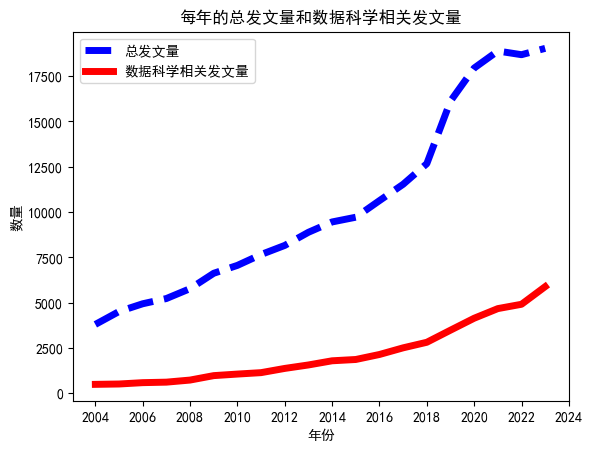

In [66]:
df_g=df.groupby('年份', as_index=False).count()
df2_g=df2.groupby('年份', as_index=False).count()

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  
x1=df_g['年份'];y1=df_g['EID']
x2=df2_g['年份'];y2=df2_g['EID']
my_x_ticks = np.arange(2004, 2025, 2)

plt.plot(x1, y1, color='blue', linewidth=5.0, linestyle='--')
plt.plot(x2, y2, color='red', linewidth=5.0, linestyle='-')
plt.xlabel('年份')
plt.ylabel('数量')
plt.title('每年的总发文量和数据科学相关发文量')
plt.xticks(my_x_ticks)
plt.legend(['总发文量', '数据科学相关发文量'], loc='upper left')
plt.show()

In [67]:
df2_g.insert(df2_g.shape[1], '占比', 0)

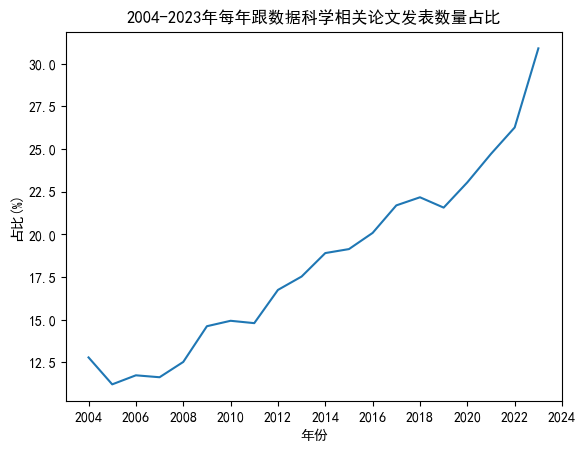

In [68]:
for year in range(0,20):
    df2_g.at[year,'占比']=df2_g['EID'][year]*100/df_g['EID'][year]
x3=df2_g['年份']
y3=df2_g['占比']
my_x_ticks = np.arange(2004, 2025, 2)
plt.plot(x3,y3)
plt.xticks(my_x_ticks)
plt.xlabel('年份')
plt.ylabel('占比(%)')
plt.title('2004-2023年每年跟数据科学相关论文发表数量占比')
plt.show()

以下是模型预测代码

In [69]:
#数据准备
x_data = df2_g[['年份']].to_numpy() 
y_data=np.ravel(df2_g['占比'])
from sklearn.model_selection import train_test_split 
X_train,X_test, y_train, y_test = train_test_split(x_data, y_data, random_state=1,test_size=0.25)
 

模型准确率: 0.9704306795931866
未来三年的预测值: [27.89942587 28.79624719 29.69306851]


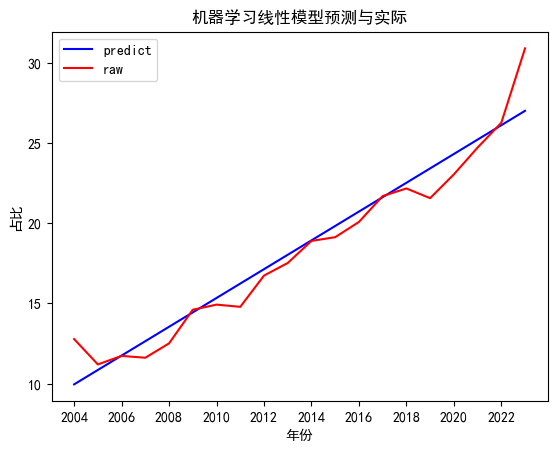

In [70]:
#一元线性回归
from sklearn.linear_model import LinearRegression 
myModel = LinearRegression() 
myResults = myModel.fit(X_train, y_train)
print("模型准确率:",myResults.score(X_test, y_test))
print("未来三年的预测值:",myResults.predict(np.array([[2024,2025,2026]]).reshape(3,1)))
y_pred = myResults.predict(x_data)
 
plt.xticks(my_x_ticks) 
plt.plot(range(2004,2024),y_pred,'b',label="predict") 
plt.plot(range(2004,2024),y_data,'r',label="raw")
plt.xlabel("年份") 
plt.ylabel("占比") 
plt.title("机器学习线性模型预测与实际") 
plt.legend() 
plt.show()

In [71]:
#尝试更复杂的多元模型

#多元线性回归
from sklearn import linear_model
model_LinearRegression = linear_model.LinearRegression()
#决策树回归
from sklearn import tree
model_DecisionTreeRegressor = tree.DecisionTreeRegressor()
#K临近回归
from sklearn import neighbors
model_KNeighborsRegressor = neighbors.KNeighborsRegressor()
#随机森林回归
from sklearn import ensemble
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=20)
#AdaBoost回归
from sklearn import ensemble
model_AdaBoostRegressor = ensemble.AdaBoostRegressor(n_estimators=50)
#GBR回归
from sklearn import ensemble
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(n_estimators=100)
#Bagging回归
from sklearn.ensemble import BaggingRegressor
model_BaggingRegressor = BaggingRegressor()
#ExtraTree回归
from sklearn.tree import ExtraTreeRegressor
model_ExtraTreeRegressor = ExtraTreeRegressor()

In [72]:
from sklearn.preprocessing import PolynomialFeatures
def model_function(regr):
    pf = PolynomialFeatures(degree=7)
    regr.fit(pf.fit_transform(X_train),y_train)
    X_predict = np.linspace(2004, 2023, 20)
    y_predict = regr.predict(pf.transform(X_predict.reshape(X_predict.shape[0], 1)))
    plt.figure(figsize=(14,4))
    plt.scatter(x_data, y_data, color='g')
    plt.plot(X_predict, y_predict, 'r-')
    plt.xticks(my_x_ticks)
    plt.xlabel('年份')
    plt.ylabel('占比')
    plt.title('年份占比预测')
    plt.show()
    print('模型准确率:',regr.score(pf.transform(X_test), y_test), 
          "\n未来三年预测值:",regr.predict(pf.transform(np.array([2024,2025,2026]).reshape(3,1))))

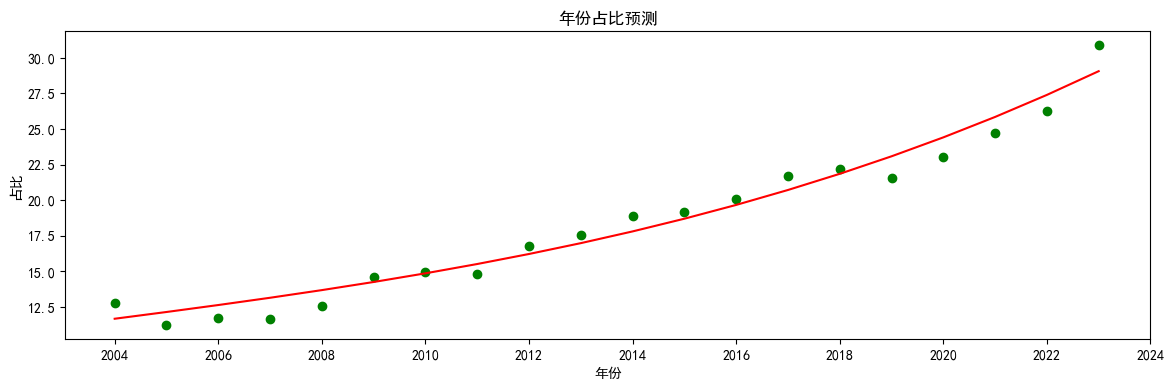

模型准确率: 0.9362807204620485 
未来三年预测值: [30.85601876 32.78125272 34.84464928]


In [73]:
model_function(model_LinearRegression)

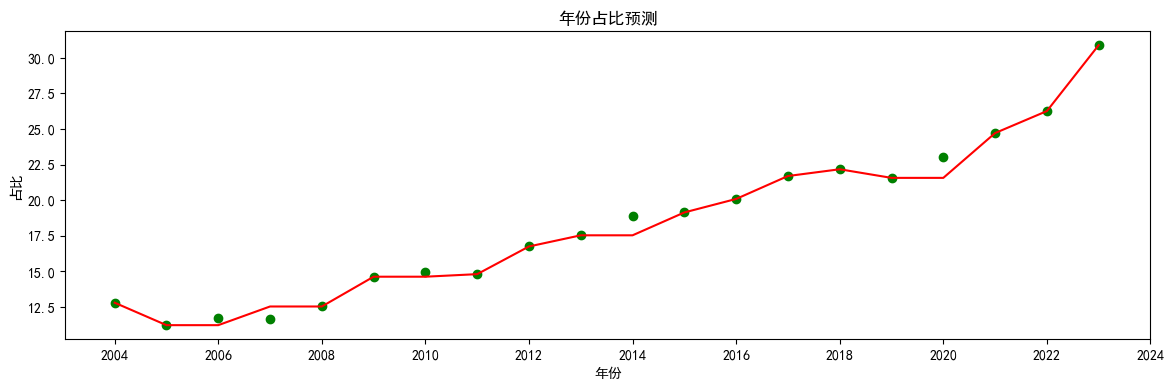

模型准确率: 0.9453981637105294 
未来三年预测值: [30.89208784 30.89208784 30.89208784]


In [74]:
model_function(model_DecisionTreeRegressor)

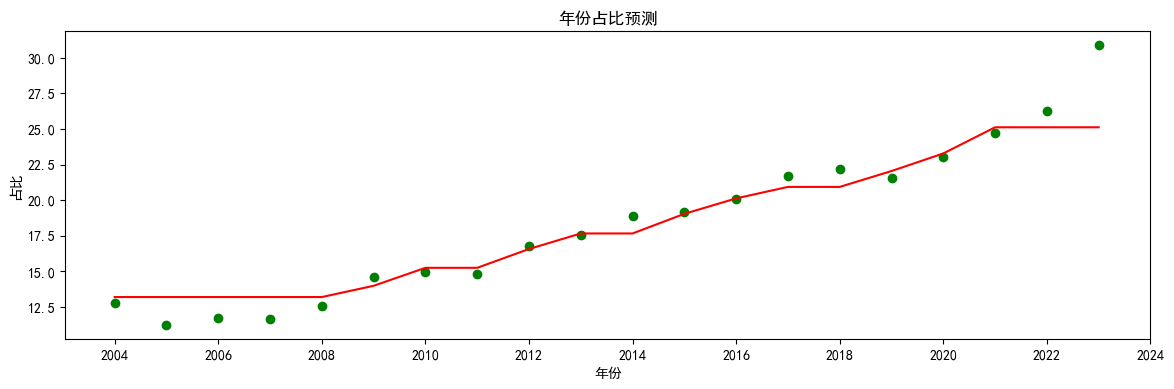

模型准确率: 0.9354540829884666 
未来三年预测值: [25.11759263 25.11759263 25.11759263]


In [75]:
model_function(model_KNeighborsRegressor)

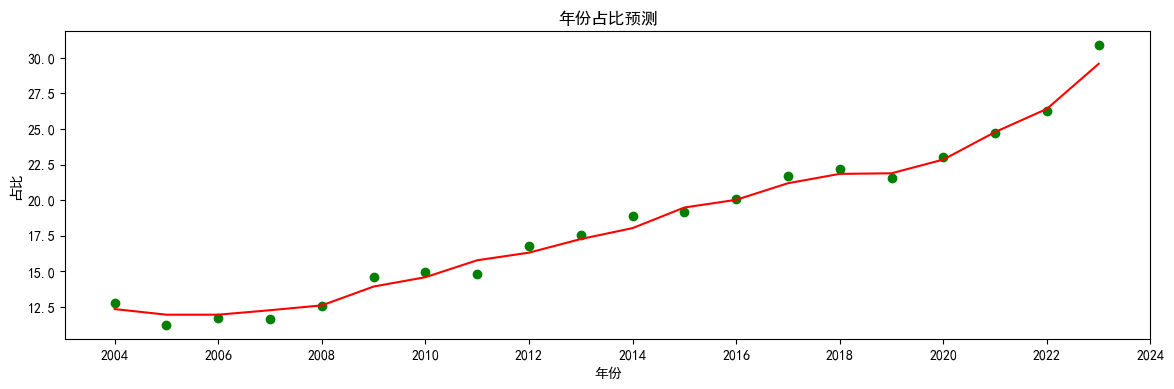

模型准确率: 0.9858806108726822 
未来三年预测值: [29.57887263 29.57887263 29.57887263]


In [76]:
model_function(model_RandomForestRegressor)

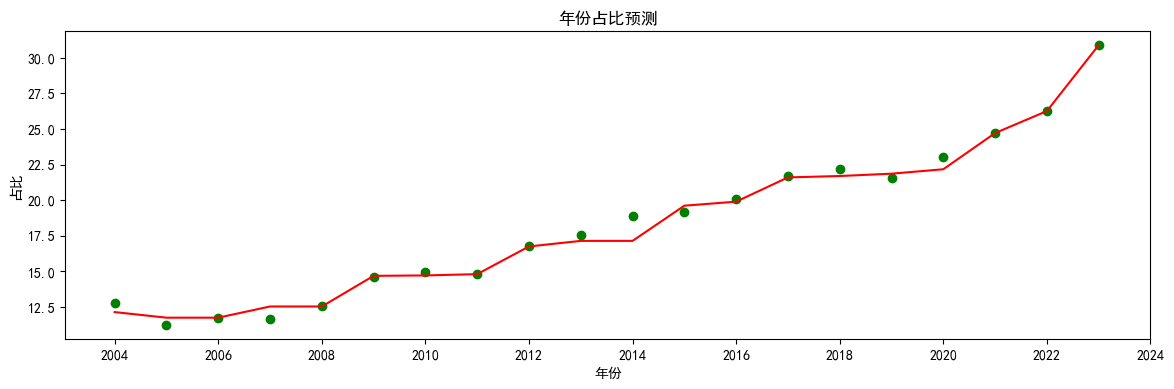

模型准确率: 0.9508347846702631 
未来三年预测值: [30.89208784 30.89208784 30.89208784]


In [77]:
model_function(model_AdaBoostRegressor)

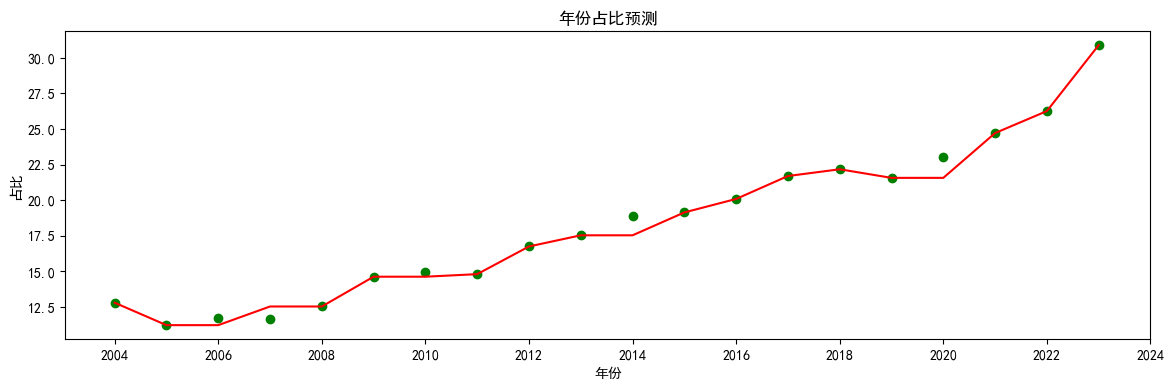

模型准确率: 0.94542310307528 
未来三年预测值: [30.8913848 30.8913848 30.8913848]


In [78]:
model_function(model_GradientBoostingRegressor)

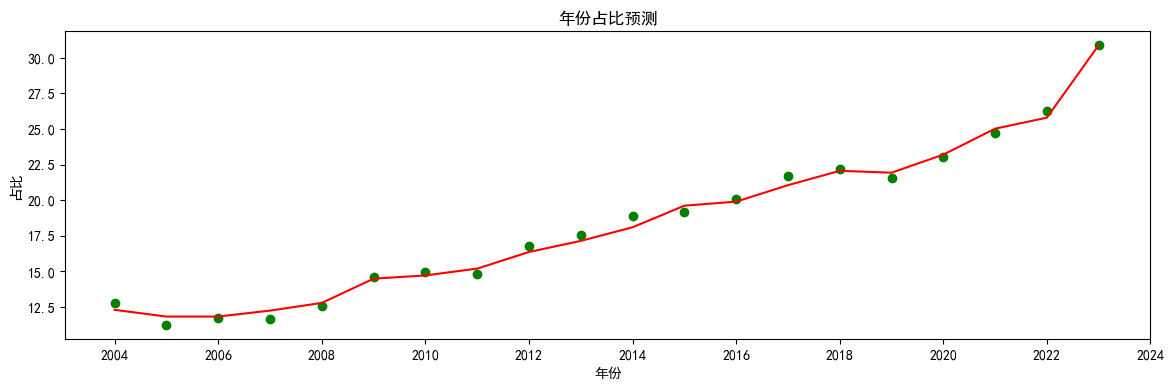

模型准确率: 0.988536479046424 
未来三年预测值: [30.89208784 30.89208784 30.89208784]


In [79]:
model_function(model_BaggingRegressor)

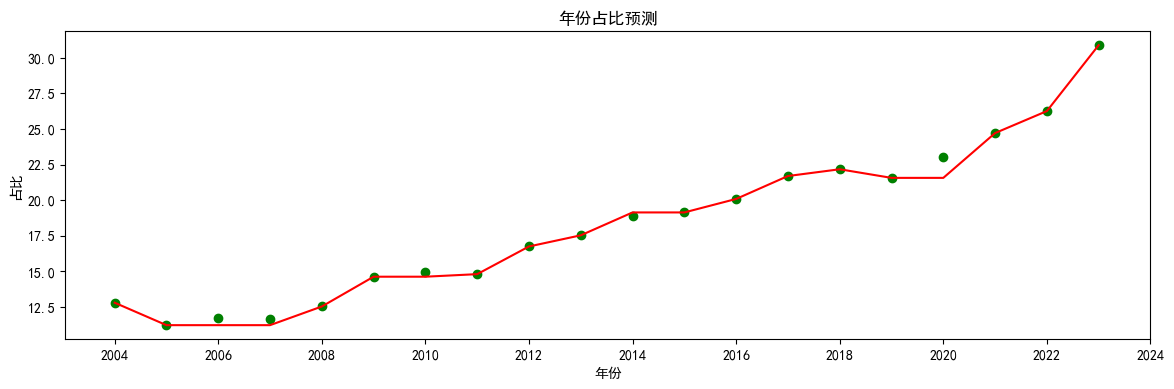

模型准确率: 0.9709432803104343 
未来三年预测值: [30.89208784 30.89208784 30.89208784]


In [80]:
model_function(model_ExtraTreeRegressor)